In [1]:
print("hello world")

hello world


In [5]:
import numpy as np
import pandas as pd
df= pd.read_csv("spam.csv",encoding="latin1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3557,ham,No da. . Vijay going to talk in jaya tv,NaN,NaN,NaN
2464,ham,They will pick up and drop in car.so no problem..,NaN,NaN,NaN
4054,ham,When is school starting. Where will you stay. ...,NaN,NaN,NaN
858,ham,Spoons it is then okay?,NaN,NaN,NaN
4338,ham,Just got outta class gonna go gym.,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [9]:
df.sample(5)

,v1,v2
907,ham,I.ll give her once i have it. Plus she said gr...
4574,ham,Not directly behind... Abt 4 rows behind Ì_...
1948,ham,I cant pick the phone right now. Pls send a me...
2810,ham,Thinkin about someone is all good. No drugs fo...
4748,ham,Thanx u darlin!im cool thanx. A few bday drink...


In [10]:
#renaming the cols
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
34,spam,Thanks for your subscription to Ringtone UK yo...
3370,ham,Tomorrow i am not going to theatre. . . So i c...
2894,ham,Went to ganesh dress shop
3756,spam,YES! The only place in town to meet exciting a...
4126,ham,"Sorry, I'll call later"


In [ ]:
from sklearn.preprocessing import LabelEncoder     #lebelencoder is used for nominal data where there are no connection between every data
encoder= LabelEncoder()


In [14]:
df['target']=encoder.fit_transform(df['target'])

In [31]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [33]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [34]:
df= df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.shape

(5169, 2)

In [37]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1fb2cdcbb60>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

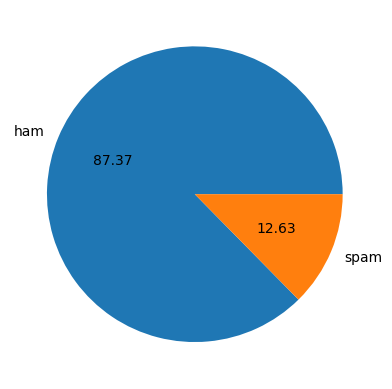

In [39]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [40]:
# Data is imbalanced

In [41]:
!pip install nltk

In [42]:
import nltk


In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
df['num_characters']=df['text'].apply(len)

In [45]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
# num of words
import nltk
nltk.download('punkt_tab')
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
# ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [51]:
! pip install seaborn
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

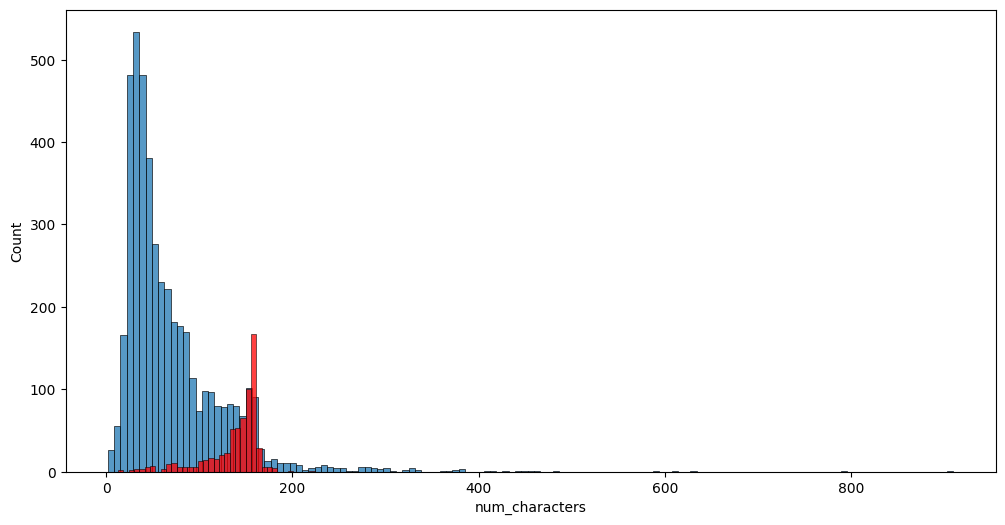

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

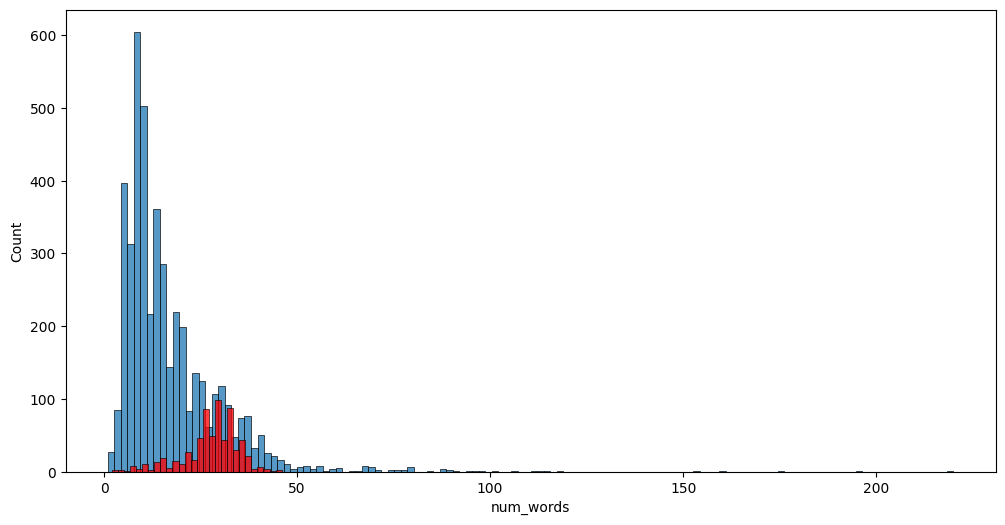

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

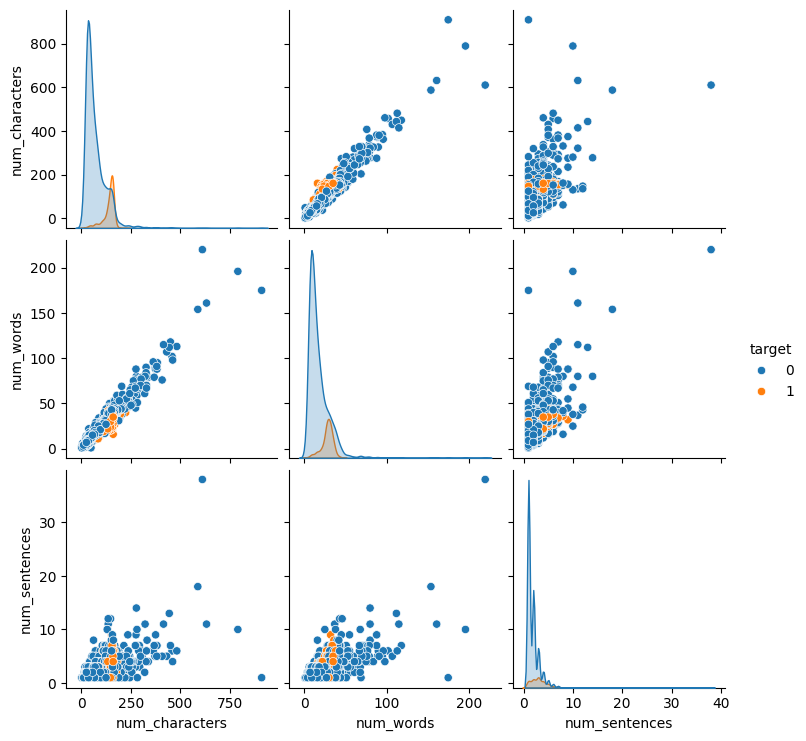

In [54]:
sns.pairplot(df,hue='target')

In [55]:

sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
## 3. Data Preprocessing
  # lower case
  # tokenization
  # removing special characters
  # removing stopn words and punctuation
  # stemming

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def transform_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

# Call the function
print(transform_text('Hii how are you'))


In [56]:

def transform_text(text):
       text= text.lower()        # removing special characters
       text= nltk.word_tokenize(text)
       
       y=[]
       for i in text:
              if i.isalnum():
                  y.append(i)

       text=y[:]
       y.clear()       

       for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                   y.append(i)    
       text= y[:]
       y.clear()

       for i in text:
            y.append(ps.stem(i)) 
       return " ".join(y)





In [57]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")   # removed stopwords

NameError: name 'stopwords' is not defined

In [58]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')  # Make sure you download stopwords

stop_words = stopwords.words('english')
print(stop_words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [60]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')  # Make sure you download stopwords

stop_words = stopwords.words('english')
print(stop_words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [62]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('singing')  # take root form to every word

'sing'

In [64]:
df['transformed_text']=df['text'].apply(transform_text)

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [67]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [68]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['transformed_text'] = df['text'].apply(preprocess_text)

text = df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" ")
spam_wc=wc.generate(text)

#wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=""))

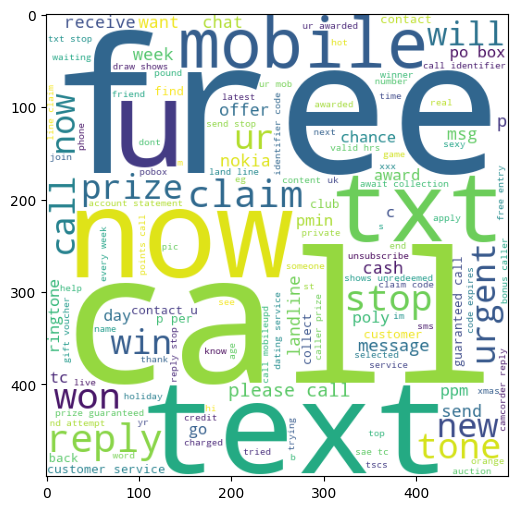

In [69]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [70]:
df['transformed_text'] = df['text'].apply(preprocess_text)

text = df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=" ")
ham_wc=wc.generate(text)

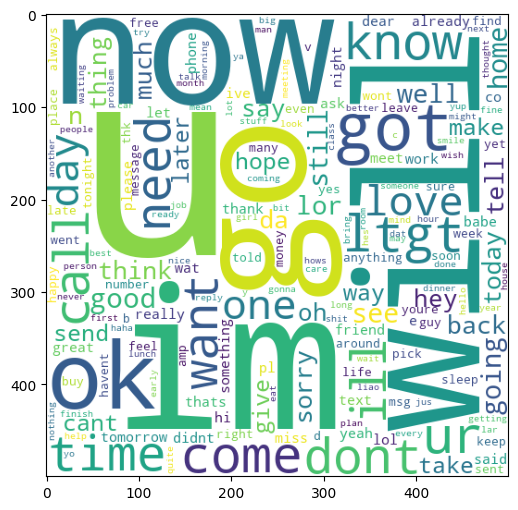

In [71]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [72]:
#top 30 word of spam and ham
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
     for words in msg.split():
          spam_corpus.append(words)

In [73]:
len(spam_corpus)

13731

In [74]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [75]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

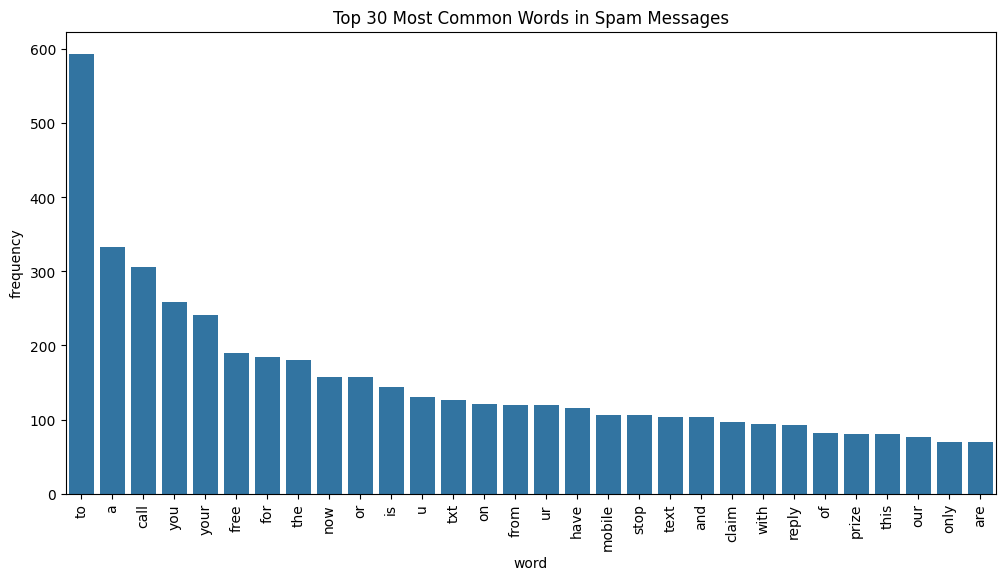

In [76]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])

# Plot
plt.figure(figsize=(12, 6))  # Optional: makes the plot wider
sns.barplot(x='word', y='frequency', data=word_freq)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()


In [77]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
     for words in msg.split():
          ham_corpus.append(words)

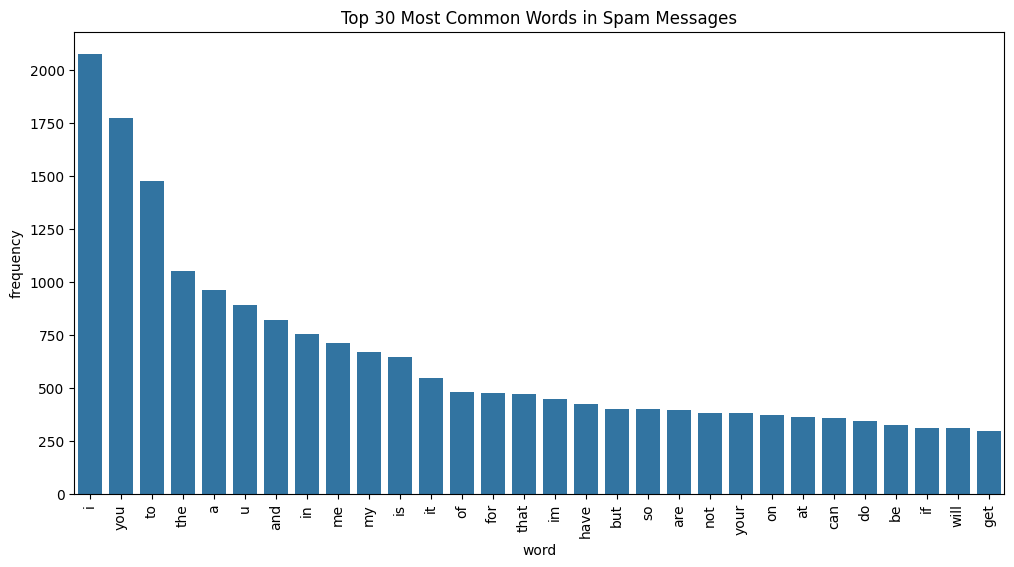

In [78]:
from collections import Counter
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])

# Plot
plt.figure(figsize=(12, 6))  # Optional: makes the plot wider
sns.barplot(x='word', y='frequency', data=word_freq)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [79]:
# 4. Model Building
# first we will vectorize data

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # bagoff vectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [81]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X= scaler.fit_transform(X)

In [ ]:
y= df['target'].values

In [82]:
X.shape

(5169, 8512)

In [83]:
y= df['target'].values

In [84]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test , y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [89]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8916827852998066
[[810  86]
 [ 26 112]]
0.5656565656565656


In [90]:
mnb.fit(X_train, y_train)   # here we are going with the precision
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.941972920696325
[[896   0]
 [ 60  78]]
1.0


In [91]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[890   6]
 [ 24 114]]
0.95


In [92]:
# we have choose tfidf for MNB because it has very high precision and not giving any false positive and in 
# project it means it does not detect any spam message as ham message

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [94]:
! pip install xgboost

In [95]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l2')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)


In [96]:
clfs= {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
    }

In [97]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [98]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9827586206896551)

In [99]:
accuracy_scores =[]
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision-", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9748549323017408
Precision- 0.9827586206896551
For KN
Accuracy - 0.9013539651837524
Precision- 1.0
For NB
Accuracy - 0.941972920696325
Precision- 1.0
For DT
Accuracy - 0.937137330754352
Precision- 0.8288288288288288
For LR
Accuracy - 0.9564796905222437
Precision- 0.9894736842105263
For RF
Accuracy - 0.9642166344294004
Precision- 1.0
For AdaBoost
Accuracy - 0.9468085106382979
Precision- 0.9368421052631579
For Bgc
Accuracy - 0.9642166344294004
Precision- 0.8854961832061069
For ETC
Accuracy - 0.9777562862669246
Precision- 1.0
For GBDT
Accuracy - 0.9545454545454546
Precision- 0.9174311926605505
For xgb
Accuracy - 0.9806576402321083
Precision- 0.9836065573770492


In [100]:
import pandas as pd
performance_df= pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)


In [101]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.941973,1.000000
5,RF,0.964217,1.000000
8,ETC,0.977756,1.000000
4,LR,0.956480,0.989474
10,xgb,0.980658,0.983607
0,SVC,0.974855,0.982759
6,AdaBoost,0.946809,0.936842
9,GBDT,0.954545,0.917431
7,Bgc,0.964217,0.885496


In [103]:
performance_df1= pd.melt(performance_df, id_vars="Algorithm")

In [104]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.901354
1,NB,Accuracy,0.941973
2,RF,Accuracy,0.964217
3,ETC,Accuracy,0.977756
4,LR,Accuracy,0.956480
5,xgb,Accuracy,0.980658
6,SVC,Accuracy,0.974855
7,AdaBoost,Accuracy,0.946809
8,GBDT,Accuracy,0.954545
9,Bgc,Accuracy,0.964217


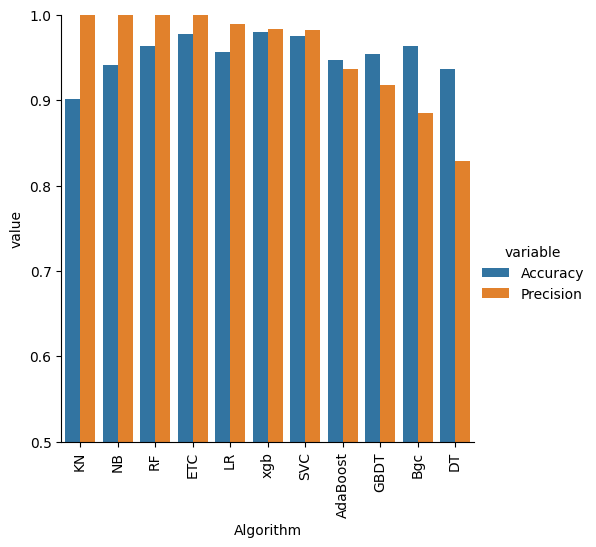

In [105]:
import seaborn as sns
sns.catplot(x='Algorithm',y='value',
            hue= 'variable', data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1.change the max_features parameter of TfIdf

In [106]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_fit_3000':accuracy_scores,'Precision_max_fit_3000': precision_scores})

In [107]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_fit_3000,Precision_max_fit_3000
0,KN,0.901354,1.000000,0.901354,1.000000
1,NB,0.941973,1.000000,0.941973,1.000000
2,RF,0.964217,1.000000,0.964217,1.000000
3,ETC,0.977756,1.000000,0.977756,1.000000
4,LR,0.956480,0.989474,0.956480,0.989474
5,xgb,0.980658,0.983607,0.980658,0.983607
6,SVC,0.974855,0.982759,0.974855,0.982759
7,AdaBoost,0.946809,0.936842,0.946809,0.936842
8,GBDT,0.954545,0.917431,0.954545,0.917431
9,Bgc,0.964217,0.885496,0.964217,0.885496


In [110]:
# Voting Classifier
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb= MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [111]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [112]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [113]:
y_pred= voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 1.0


In [114]:
import pickle
pickle.dump(tfidf,open('vectoeizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
